# Big Data Project

## Phase 0: Imports

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import ast

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load(filepath):
    filename = os.path.basename(filepath)

    if "features" in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if "echonest" in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if "genres" in filename:
        return pd.read_csv(filepath, index_col=0)

    if "tracks" in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [
            ("track", "tags"),
            ("album", "tags"),
            ("artist", "tags"),
            ("track", "genres"),
            ("track", "genres_all"),
        ]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [
            ("track", "date_created"),
            ("track", "date_recorded"),
            ("album", "date_created"),
            ("album", "date_released"),
            ("artist", "date_created"),
            ("artist", "active_year_begin"),
            ("artist", "active_year_end"),
        ]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ("small", "medium", "large")
        try:
            tracks["set", "subset"] = tracks["set", "subset"].astype(
                "category", categories=SUBSETS, ordered=True
            )
        except (ValueError, TypeError):
            # the categories and ordered arguments were removed in pandas 0.25
            tracks["set", "subset"] = tracks["set", "subset"].astype(
                pd.CategoricalDtype(categories=SUBSETS, ordered=True)
            )

        COLUMNS = [
            ("track", "genre_top"),
            ("track", "license"),
            ("album", "type"),
            ("album", "information"),
            ("artist", "bio"),
        ]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype("category")

        return tracks


In [4]:
tracks = load("docker/app/worker/data/raw/fma_metadata/tracks.csv")

In [5]:
tracks

album                                                              \
         comments        date_created date_released engineer favorites     id   
track_id                                                                        
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4      6   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2      4   
...           ...                 ...           ...      ...       ...    ...   
155316          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155317          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155318          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155319          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155320          0 2017-03-26 16:22:18    2017-03-26      NaN         1  22906   

                                                                     \
                                                information listens   
track_id                                                              
2                                                   <p></p>    6073   
3                                                   <p></p>    6073   
5                                                   <p></p>    6073   
10                                                      NaN   47632   
20                <p> "spiritual songs" from Nicky Cook</p>    2710   
...                                                     ...     ...   
155316    <p>A live performance at Monty Hall on Feb 17,...    1506   
155317    <p>A live performance at Monty Hall on Feb 17,...    1506   
155318    <p>A live performance at Monty Hall on Feb 17,...    1506   
155319    <p>A live performance at Monty Hall on Feb 17,...    1506   
155320                                                  NaN    7481   

                                                                          ...  \
             producer                                               tags  ...   
track_id                                                                  ...   
2                 NaN                                                 []  ...   
3                 NaN                                                 []  ...   
5                 NaN                                                 []  ...   
10                NaN                                                 []  ...   
20                NaN                                                 []  ...   
...               ...                                                ...  ...   
155316    Monty Hall                                                  []  ...   
155317    Monty Hall                                                  []  ...   
155318    Monty Hall                                                  []  ...   
155319    Monty Hall                                                  []  ...   
155320            NaN  [ballad, epic, rockabilly, curse, hex, hard ro...  ...   

               track                         \
         information interest language_code   
track_id                                      
2                NaN     4656            en   
3                NaN     1470            en   
5                NaN     1933            en   
10               NaN    54881            en   
20               NaN      978            en   
...              ...      ...           ...   
155316           NaN      122           NaN   
155317           NaN      194           NaN   
155318           NaN      214           NaN   
155319           NaN      336           NaN   
155320           NaN      972           NaN   

                                                                              \
        

In [6]:
tracks.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

Track Duration Statistics:
Mean duration: 277.85 seconds (4.63 minutes)
Median duration: 216.00 seconds
Min duration: 0.00 seconds
Max duration: 18350.00 seconds
Std deviation: 305.52 seconds


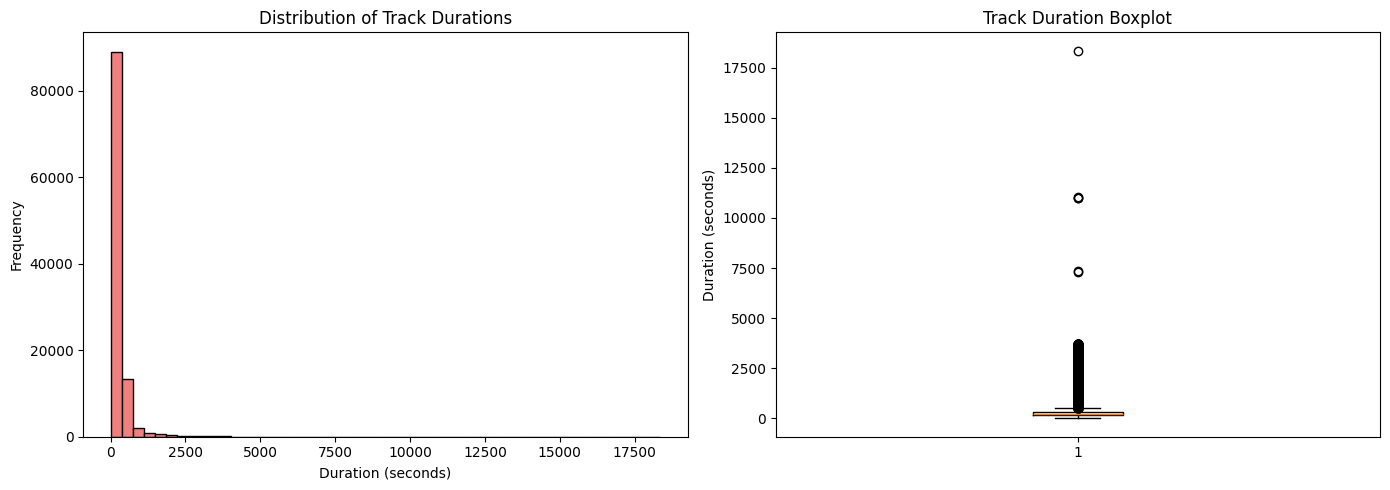

In [7]:
# Analyze track duration statistics
durations = tracks['track', 'duration'].dropna()

print("Track Duration Statistics:")
print(f"Mean duration: {durations.mean():.2f} seconds ({durations.mean()/60:.2f} minutes)")
print(f"Median duration: {durations.median():.2f} seconds")
print(f"Min duration: {durations.min():.2f} seconds")
print(f"Max duration: {durations.max():.2f} seconds")
print(f"Std deviation: {durations.std():.2f} seconds")

# Plot duration distribution
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(durations, bins=50, color='lightcoral', edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Track Durations')

plt.subplot(1, 2, 2)
plt.boxplot(durations)
plt.ylabel('Duration (seconds)')
plt.title('Track Duration Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
# Create a helper function to get track info by ID
def get_track_info(track_id):
    """
    Get detailed information about a track from its ID.
    
    Args:
        track_id: The ID of the track to retrieve
        
    Returns:
        dict: Dictionary containing track information
    """
    if track_id not in tracks.index:
        return {"error": f"Track ID {track_id} not found"}
    
    track_info = {
        'id': track_id,
        'title': tracks.loc[track_id, ('track', 'title')],
        'artist': tracks.loc[track_id, ('artist', 'name')],
        'album': tracks.loc[track_id, ('album', 'title')],
        'genre': tracks.loc[track_id, ('track', 'genre_top')],
        'listens': tracks.loc[track_id, ('track', 'listens')],
        'date_created': tracks.loc[track_id, ('track', 'date_created')],
    }
    
    return track_info

# Test the function
test_track = get_track_info(2)
print("Track information using helper function:")
for key, value in test_track.items():
    print(f"{key}: {value}")

Track information using helper function:
id: 2
title: Food
artist: AWOL
album: AWOL - A Way Of Life
genre: Hip-Hop
duration: 168
listens: 1293
date_created: 2008-11-26 01:48:12


Genre distribution:
(track, genre_top)
Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: count, dtype: int64


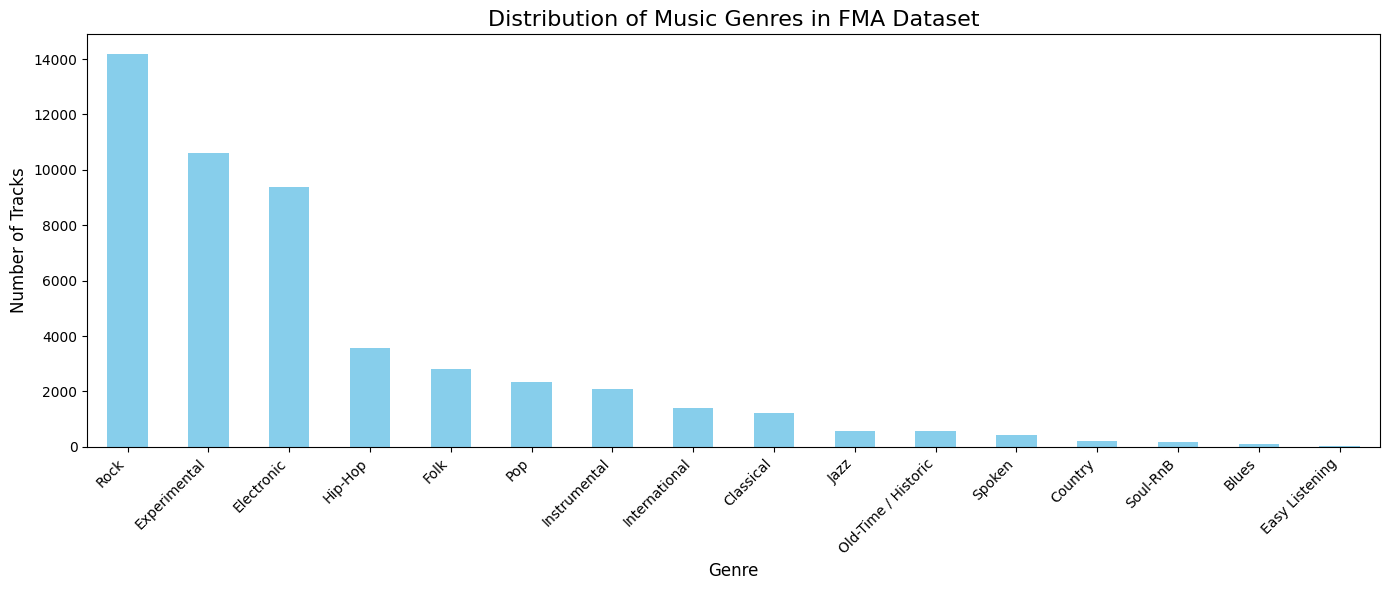

In [9]:
# Analyze genre distribution
genre_counts = tracks['track', 'genre_top'].value_counts()

print("Genre distribution:")
print(genre_counts)

# Plot the distribution
plt.figure(figsize=(14, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Music Genres in FMA Dataset', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Get all tracks from a specific genre
specific_genre = 'Rock'
rock_tracks = tracks[tracks['track', 'genre_top'] == specific_genre]

print(f"Number of {specific_genre} tracks: {len(rock_tracks)}")
print(f"\nFirst 5 {specific_genre} tracks:")
print(rock_tracks[['track', 'artist']].head())

Number of Rock tracks: 14182

First 5 Rock tracks:
            track                                                             \
         bit_rate comments        composer        date_created date_recorded   
track_id                                                                       
135        256000        1             NaN 2008-11-26 01:43:26    2008-11-26   
136        256000        1             NaN 2008-11-26 01:43:35    2008-11-26   
151        192000        0             NaN 2008-11-26 01:44:55           NaT   
152        192000        0             NaN 2008-11-26 01:44:58           NaT   
153        256000        0  Arc and Sender 2008-11-26 01:45:00    2008-11-26   

                                                               ... artist  \
         duration favorites genre_top    genres    genres_all  ...     id   
track_id                                                       ...          
135           837         0      Rock  [45, 58]  [58, 12, 45]  ...     52   


In [11]:
# Extract multiple tracks at once
track_ids = [2, 5, 10, 15, 20]

for track_id in track_ids:
    if track_id in tracks.index:
        print(f"\n--- Track {track_id} ---")
        print(f"Title: {tracks.loc[track_id, ('track', 'title')]}")
        print(f"Artist: {tracks.loc[track_id, ('artist', 'name')]}")
        print(f"Genre: {tracks.loc[track_id, ('track', 'genre_top')]}")
        print(f"Duration: {tracks.loc[track_id, ('track', 'duration')]} seconds")


--- Track 2 ---
Title: Food
Artist: AWOL
Genre: Hip-Hop
Duration: 168 seconds

--- Track 5 ---
Title: This World
Artist: AWOL
Genre: Hip-Hop
Duration: 206 seconds

--- Track 10 ---
Title: Freeway
Artist: Kurt Vile
Genre: Pop
Duration: 161 seconds

--- Track 20 ---
Title: Spiritual Level
Artist: Nicky Cook
Genre: nan
Duration: 311 seconds


In [12]:
# Extract specific information from a track ID
track_id = 2

# Access track-specific information
track_title = tracks.loc[track_id, ('track', 'title')]
track_genre = tracks.loc[track_id, ('track', 'genre_top')]
artist_name = tracks.loc[track_id, ('artist', 'name')]
album_title = tracks.loc[track_id, ('album', 'title')]

print(f"Track ID: {track_id}")
print(f"Title: {track_title}")
print(f"Artist: {artist_name}")
print(f"Album: {album_title}")
print(f"Genre: {track_genre}")

Track ID: 2
Title: Food
Artist: AWOL
Album: AWOL - A Way Of Life
Genre: Hip-Hop


In [13]:
# Get a specific track by ID
track_id = 2  # Example track ID
print(f"Track ID: {track_id}")
print("\nTrack information:")
print(tracks.loc[track_id])

Track ID: 2

Track information:
album   comments                                                             0
        date_created                                       2008-11-26 01:44:45
        date_released                                      2009-01-05 00:00:00
        engineer                                                           NaN
        favorites                                                            4
        id                                                                   1
        information                                                    <p></p>
        listens                                                           6073
        producer                                                           NaN
        tags                                                                []
        title                                             AWOL - A Way Of Life
        tracks                                                               7
        type        

In [14]:
# Show the first level of columns (main categories)
print("Column levels:")
print(tracks.columns.levels[0])

Column levels:
Index(['album', 'artist', 'set', 'track'], dtype='object')


In [15]:
# Check the shape of the tracks DataFrame
print(f"Tracks DataFrame shape: {tracks.shape}")
print(f"Number of tracks: {tracks.shape[0]}")
print(f"Number of columns: {tracks.shape[1]}")

Tracks DataFrame shape: (106574, 52)
Number of tracks: 106574
Number of columns: 52


### Understanding the data shape and structure

## Phase 1 : Dataset Selection and Data Acquisition

### Importing

In [3]:
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'gtzan-dataset-music-genre-classification' dataset.
Path to dataset files: /kaggle/input/gtzan-dataset-music-genre-classification


In [4]:
categories = list(os.listdir(f'{path}/Data/genres_original/'))

In [5]:
categories

['disco',
 'metal',
 'reggae',
 'blues',
 'rock',
 'classical',
 'jazz',
 'hiphop',
 'country',
 'pop']

In [6]:
print("Number of files per category:")
for category in categories:
    category_path = os.path.join(path, 'Data', 'genres_original', category)
    if os.path.isdir(category_path):
        num_files = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])
        print(f"- {category}: {num_files} files")

Number of files per category:
- disco: 100 files
- metal: 100 files
- reggae: 100 files
- blues: 100 files
- rock: 100 files
- classical: 100 files
- jazz: 100 files
- hiphop: 100 files
- country: 100 files
- pop: 100 files


In [7]:
pop_category_path = os.path.join(path, 'Data', 'genres_original', 'pop')

all_files_in_pop = os.listdir(pop_category_path)

pop_files = [f for f in all_files_in_pop if os.path.isfile(os.path.join(pop_category_path, f))][:5]

print("First 5 files in the 'pop' directory:")
for file_name in pop_files:
    print(f"- {file_name}")

First 5 files in the 'pop' directory:
- pop.00016.wav
- pop.00030.wav
- pop.00017.wav
- pop.00044.wav
- pop.00094.wav


### File shape

- Sound (y): sequence of vibrations in varying pressure intensities
- Sample rate (sr): number of audio samples carried per second (Hz)

In [8]:
def get_length(y):
  return np.shape(y)[0]

In [9]:
y, sr = librosa.load(f'{path}/Data/genres_original/reggae/reggae.00036.wav')

print('y:', y, '\n')
print('Sample Rate (KHz):', sr, '\n')

y_shape = np.shape(y)
print('y shape:', y_shape, '\n')

print('Check Len of Audio:', y_shape[0]/sr, 'seconds')

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Sample Rate (KHz): 22050 

y shape: (661794,) 

Check Len of Audio: 30.013333333333332 seconds


In [10]:
print("Lenght", get_length(y))

Lenght 661794


Trim leading and trailing silence from an audio signal (silence before and after the actual audio)

In [11]:
audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


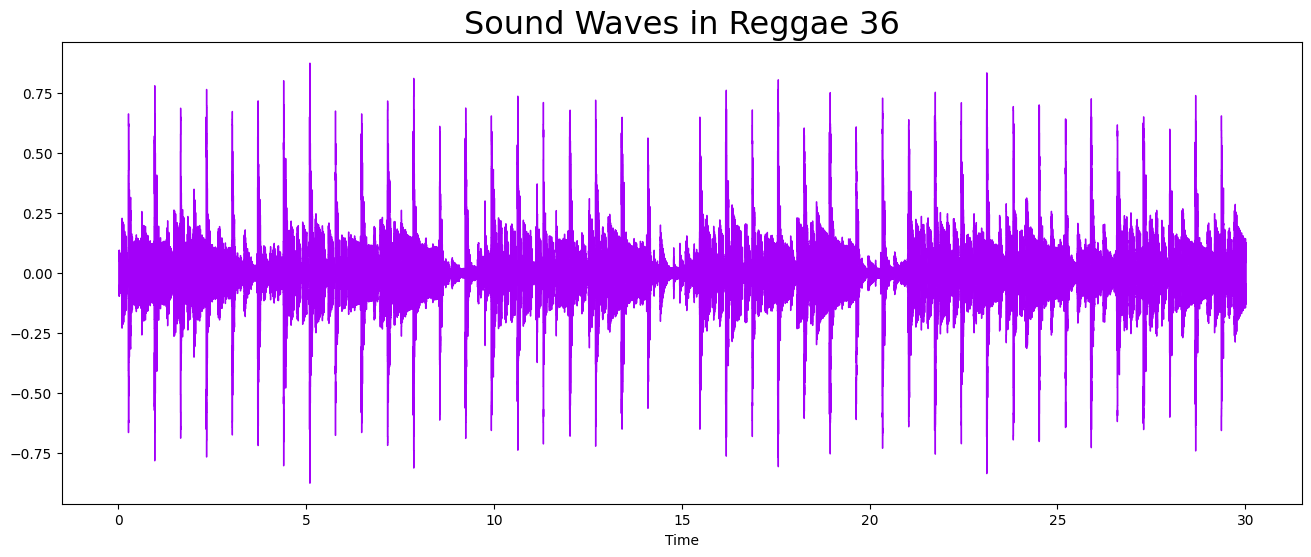

In [12]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 36", fontsize = 23);

Displaying the fourier transform

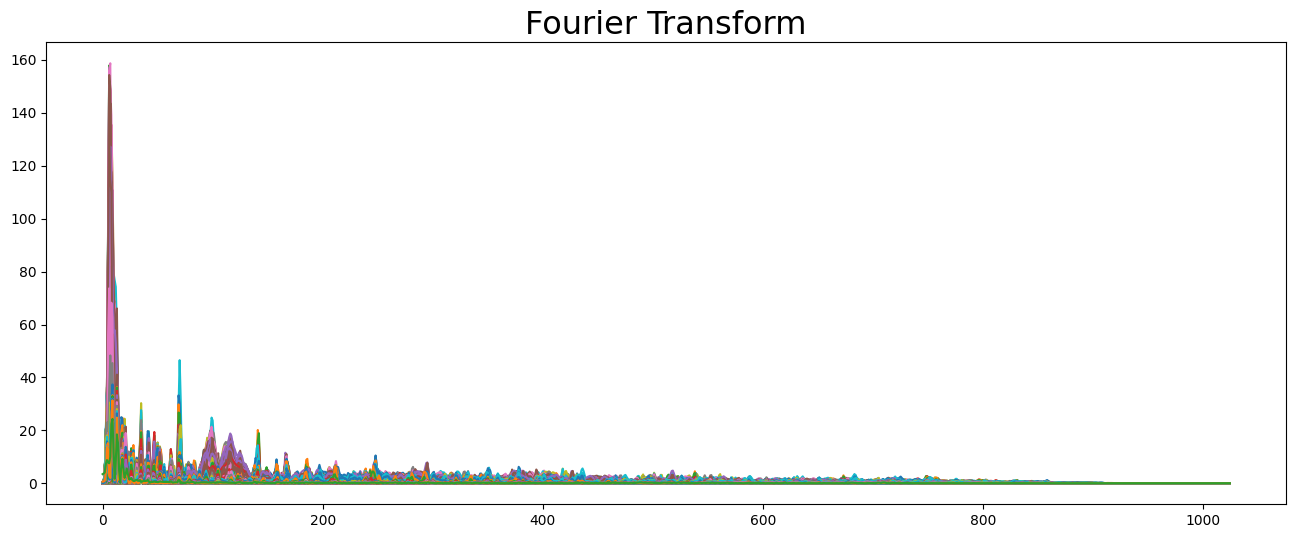

In [13]:
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

plt.figure(figsize = (16, 6))
plt.title("Fourier Transform", fontsize = 23);
plt.plot(D);

Convert an amplitude spectrogram to Decibels-scaled spectrogram.

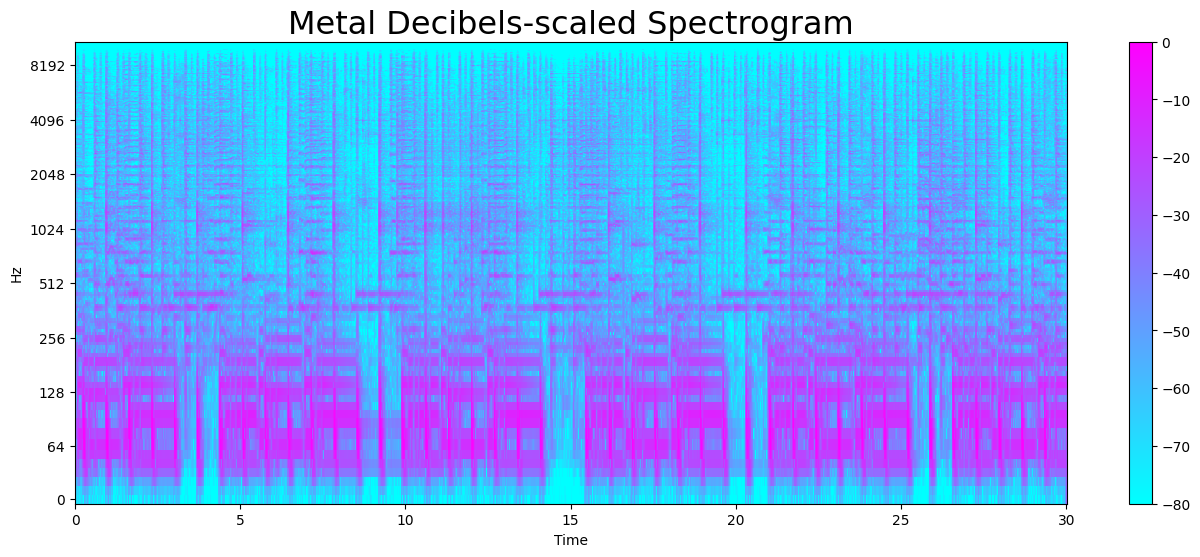

In [14]:
DB = librosa.amplitude_to_db(D, ref = np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();
plt.title("Metal Decibels-scaled Spectrogram", fontsize = 23);

The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

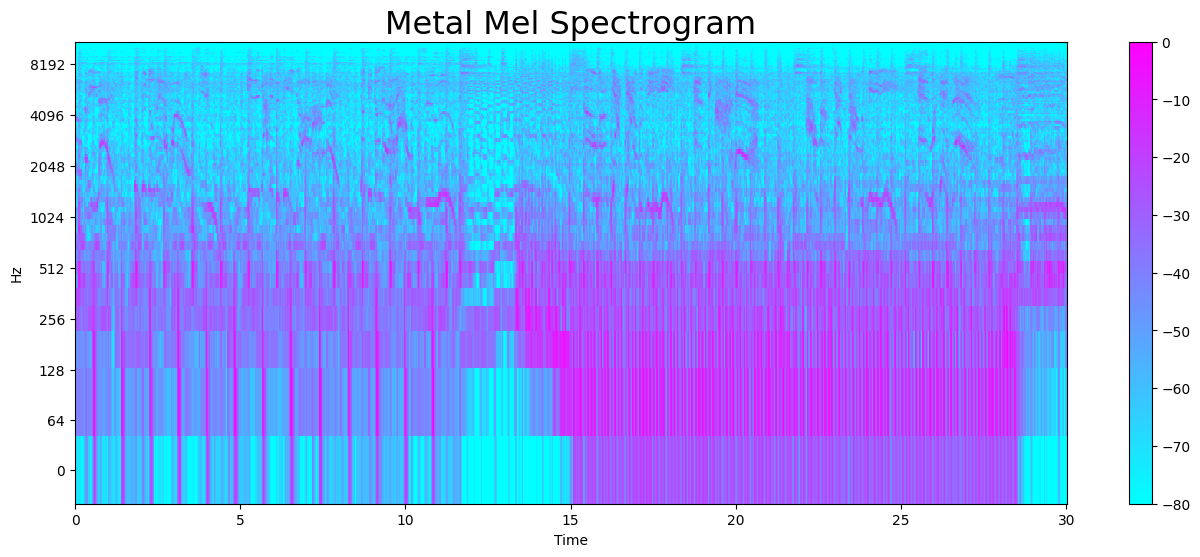

In [15]:
y, sr = librosa.load(f'{path}/Data/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

## Phase 2: Audio features identification

### Collecting Features

#### Chroma Frequencies¶

Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

In [16]:
def get_chroma_stft_mean_var(y, hop_length=5000):
  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
  return np.mean(chroma_stft), np.var(chroma_stft)

In [17]:
chroma_stft_mean, chroma_stft_var = get_chroma_stft_mean_var(audio_file)

print('Chroma STFT mean: ', chroma_stft_mean)
print('Chroma STFT variance: ', chroma_stft_var)

Chroma STFT mean:  0.42274883
Chroma STFT variance:  0.09166018


Chromogram shape: (12, 133)


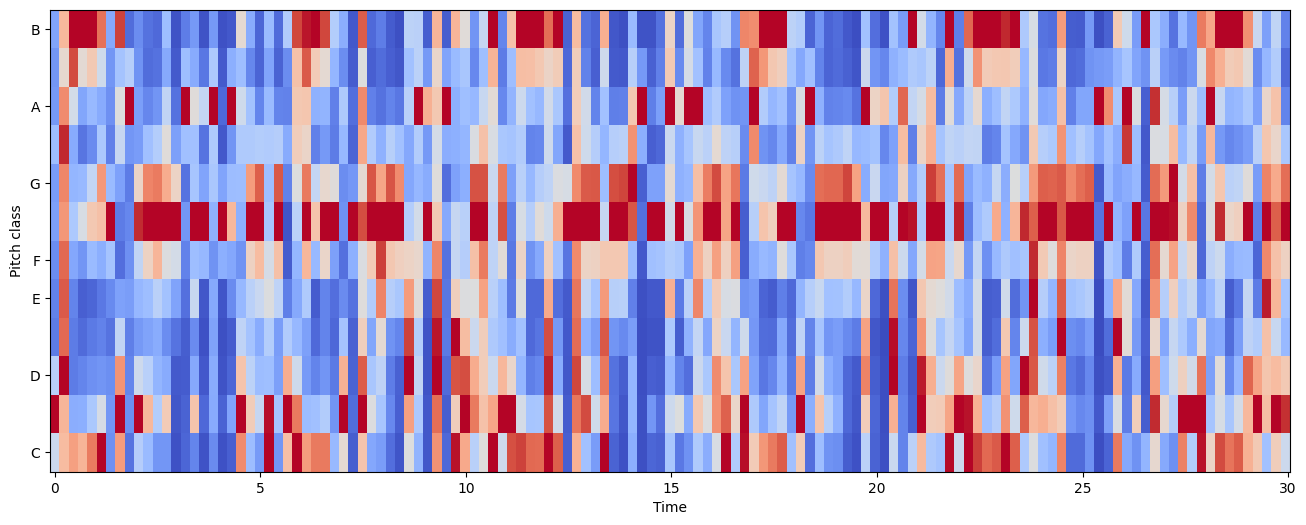

In [18]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

#### RMS

root mean square

In [19]:
def get_rms_mean_var(y):
  rms = librosa.feature.rms(y=y)[0]
  return np.mean(rms), np.var(rms)

In [20]:
rms_mean, rms_var = get_rms_mean_var(audio_file)
print('RMS Mean:', rms_mean)
print('RMS Variance:', rms_var)

RMS Mean: 0.079960585
RMS Variance: 0.0031735515


#### Spectral Centroid¶

Indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [21]:
def get_spectral_centroid_mean_var(y):
  spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
  return np.mean(spectral_centroids), np.var(spectral_centroids)

In [22]:
spectral_centroid_mean, spectral_centroid_var = get_spectral_centroid_mean_var(audio_file)

print('Spectral Centroid Mean:', spectral_centroid_mean)
print('Spectral Centroid Variance:', spectral_centroid_var)

Spectral Centroid Mean: 1811.1579026505942
Spectral Centroid Variance: 654160.9625131282


In [23]:
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

Centroids: [1758.29476821 1946.74243805 2038.81133429 ...  766.50415702 1041.07728753
 1391.05146262] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


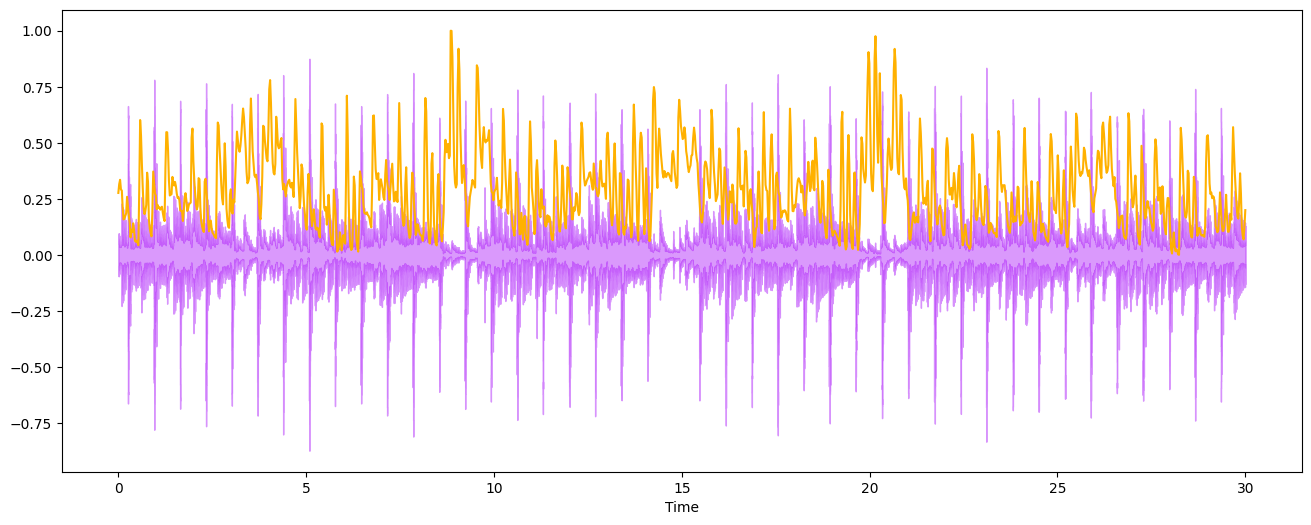

In [24]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize = (16, 6))
librosa.display.waveshow(y= audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

#### Spectral Bandwidth

In [25]:
def get_spectral_bandwidth_mean_var(y):
  spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
  return np.mean(spectral_bandwidth), np.var(spectral_bandwidth)

In [26]:

spectral_bandwidth_mean, spectral_bandwidth_var = get_spectral_bandwidth_mean_var(audio_file)
print('Spectral Bandwidth Mean:', spectral_bandwidth_mean)
print('Spectral Bandwidth Variance:', spectral_bandwidth_var)

Spectral Bandwidth Mean: 2166.3985648744233
Spectral Bandwidth Variance: 182375.87341703297


#### Spectral Rolloff¶

Is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

In [27]:
def get_spectral_rolloff_mean_var(y):
  spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
  return np.mean(spectral_rolloff), np.var(spectral_rolloff)

In [28]:
spectral_rolloff_mean, spectral_rolloff_var = get_spectral_rolloff_mean_var(audio_file)

print('Spectral Rolloff Mean:', spectral_rolloff_mean)
print('Spectral Rolloff Variance:', spectral_rolloff_var)

Spectral Rolloff Mean: 4119.003657011311
Spectral Rolloff Variance: 2870171.685144845


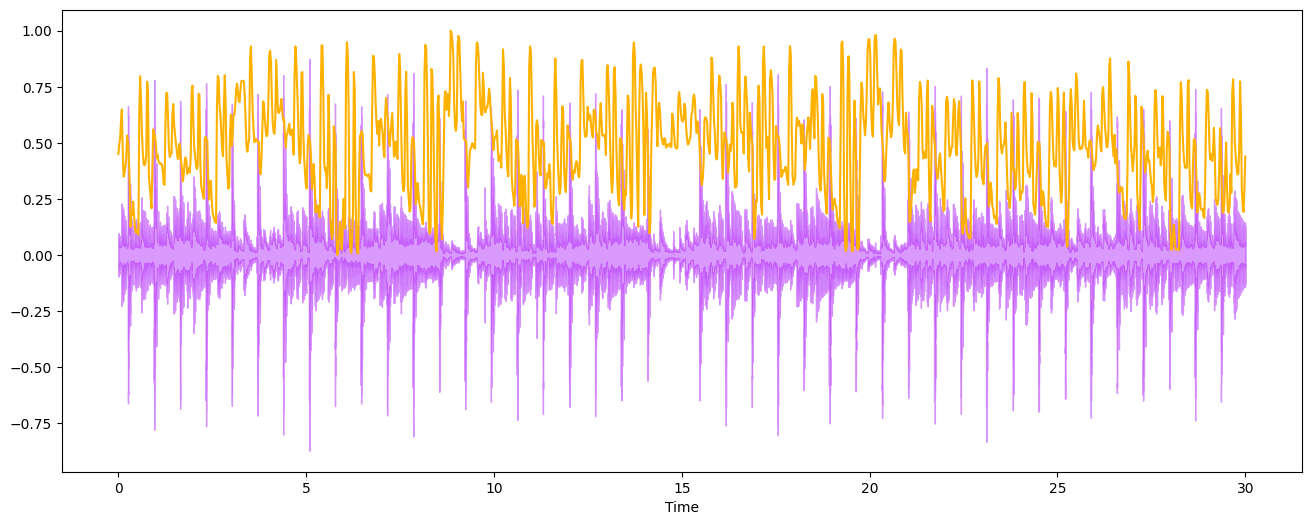

In [29]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y=audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

#### Zero Crossing Rate¶

The rate at which the signal changes from positive to negative or back.

In [30]:
def get_zero_crossing_rate_mean_var(y):
  zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0]
  return np.mean(zero_crossing_rate), np.var(zero_crossing_rate)

In [31]:
zero_crossings_rate_mean, zero_crossings_rate_var = get_zero_crossing_rate_mean_var(audio_file)

print('Zero Crossings Rate Mean:', zero_crossings_rate_mean)
print('Zero Crossings Rate Variance:', zero_crossings_rate_var)

Zero Crossings Rate Mean: 0.0592051400570379
Zero Crossings Rate Variance: 0.0020214878501676717


#### Harmonics and Perceptrual¶

In [32]:
def get_harmonics_perceptrual_mean_var(y):
  y_harm, y_perc = librosa.effects.hpss(y)
  return np.mean(y_harm), np.mean(y_perc), np.var(y_harm), np.var(y_perc)

In [33]:
harmonics_mean, perceptrual_mean, harmonics_var, perceptrual_var = get_harmonics_perceptrual_mean_var(audio_file)

print('Harmonics Mean:', harmonics_mean)
print('Perceptrual Mean:', perceptrual_mean)
print('Harmonics Variance:', harmonics_var)
print('Perceptrual Variance:', perceptrual_var)

Harmonics Mean: -1.9582017e-06
Perceptrual Mean: -1.9052773e-05
Harmonics Variance: 0.003826311
Perceptrual Variance: 0.003327478


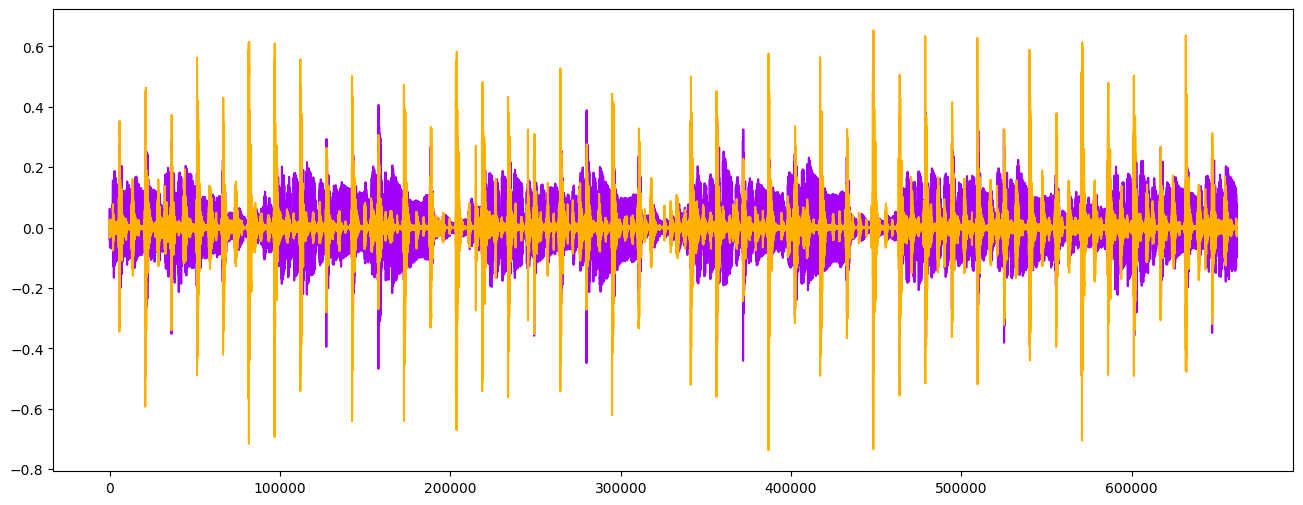

In [34]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

#### Tempo BMP

In [35]:
def get_tempo(y):
  tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
  return tempo[0]

In [36]:
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
print(tempo[0], " bpm")

143.5546875  bpm


#### Mel-Frequency Cepstral Coefficients:¶

In [37]:
def get_mfcc_mean_var(y, sr):
  mfcc = librosa.feature.mfcc(y=y, sr=sr)
  # Removed the scaling here as we will be doing it on the whole dataset
  #mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
  mfcc_features = []
  for i in range(mfcc.shape[0]):
    mfcc_features.append(np.mean(mfcc[i]))
    mfcc_features.append(np.var(mfcc[i]))
  return np.array(mfcc_features)

In [38]:
print('MFCC shape:', get_mfcc_mean_var(audio_file, sr).shape)
print('MFCC:', get_mfcc_mean_var(audio_file, sr))

MFCC shape: (40,)
MFCC: [-5.9005369e-09  1.0000000e+00  0.0000000e+00  1.0000000e+00
  1.9176746e-08  9.9999982e-01 -5.9005369e-09  1.0000000e+00
  5.9005369e-09  1.0000000e+00  0.0000000e+00  1.0000000e+00
 -1.1801074e-08  1.0000001e+00  0.0000000e+00  1.0000001e+00
  5.9005369e-09  1.0000000e+00  2.2127014e-09  1.0000000e+00
 -5.9005369e-09  9.9999982e-01 -5.9005369e-09  9.9999988e-01
  0.0000000e+00  1.0000000e+00  5.9005369e-09  1.0000000e+00
  2.9502685e-09  1.0000000e+00 -1.4751343e-08  1.0000001e+00
 -5.9005369e-09  1.0000000e+00  0.0000000e+00  1.0000000e+00
  0.0000000e+00  1.0000001e+00 -4.4254027e-09  1.0000000e+00]


mfccs shape: (20, 1293)


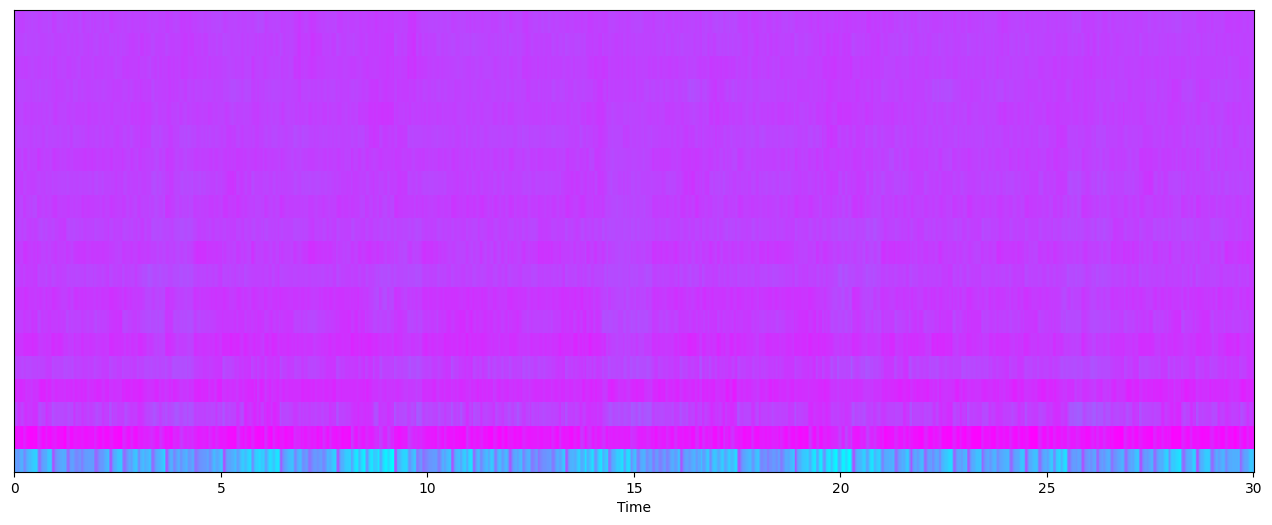

In [39]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Mean: -1.032594e-09 

Var: 1.0000001


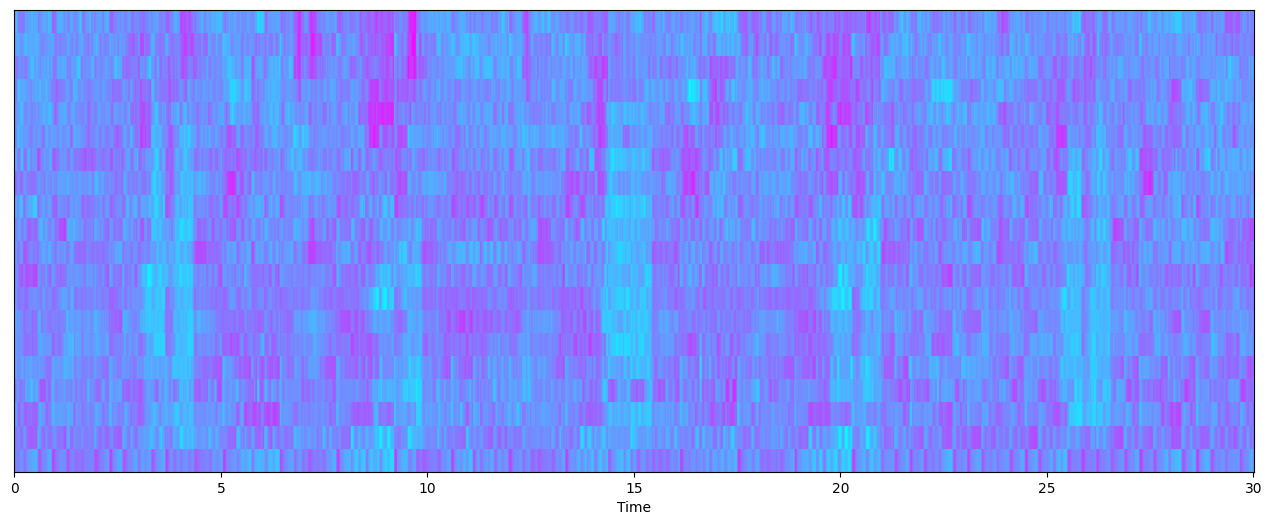

In [40]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

### Extraction function

In [41]:
def extract_features(y, sr, audio):
    features = np.array([])

    # appends mean var results to the array
    features = np.hstack((features, get_length(y)))
    features = np.hstack((features, get_chroma_stft_mean_var(y)))
    features = np.hstack((features, get_rms_mean_var(y)))
    features = np.hstack((features, get_spectral_centroid_mean_var(y)))
    features = np.hstack((features, get_spectral_bandwidth_mean_var(y)))
    features = np.hstack((features, get_spectral_rolloff_mean_var(y)))
    features = np.hstack((features, get_zero_crossing_rate_mean_var(y)))
    features = np.hstack((features, get_harmonics_perceptrual_mean_var(y)))
    features = np.hstack((features, get_tempo(y)))
    features = np.hstack((features, get_mfcc_mean_var(y, sr)))

    return features

In [42]:
features = extract_features(y, sr, audio_file)

print('Features shape:', features.shape)
print('Features:', features)

Features shape: (58,)
Features: [ 6.61504000e+05  5.15568733e-01  6.96501657e-02  1.12159654e-01
  8.30213598e-04  2.68567809e+03  1.77717705e+05  2.31757977e+03
  3.45597138e+04  5.33125804e+03  5.44148026e+05  1.60433434e-01
  2.39285245e-03  3.48331014e-06  2.97444261e-04  4.64460067e-03
  3.58924107e-03  1.43554688e+02 -1.18010739e-08  1.00000024e+00
  0.00000000e+00  9.99999881e-01  1.47513424e-09  1.00000000e+00
  0.00000000e+00  1.00000000e+00 -1.18010739e-08  1.00000012e+00
  1.18010739e-08  1.00000000e+00  2.36021478e-08  1.00000000e+00
  1.18010739e-08  1.00000000e+00 -2.36021478e-08  1.00000000e+00
  1.18010739e-08  1.00000000e+00  0.00000000e+00  1.00000012e+00
  5.90053695e-09  1.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  9.99999881e-01  0.00000000e+00  1.00000000e+00
  0.00000000e+00  1.00000000e+00 -1.18010739e-08  1.00000000e+00
  1.18010739e-08  9.99999881e-01  5.90053695e-09  1.00000000e+00
  5.90053695e-09  9.99999821e-01]


In [47]:
def convert_to_df(features):
  columns = ['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'perceptr_mean', 'harmony_var', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var','mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']
  df = pd.DataFrame([features], columns=columns)
  return df

In [48]:
def add_label_to_df(df, label):
  df['label'] = label
  return df

In [49]:
def add_filename_and_label(features, filename, label):
  df = convert_to_df(features)
  df = add_label_to_df(df, label)
  df.insert(0, 'filename', filename)
  return df

In [50]:
dataframe = add_filename_and_label(features, 'reggae.00036.wav', 'reggae')

print(dataframe)

           filename    length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  reggae.00036.wav  661504.0          0.515569          0.06965   0.11216   

   rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.00083             2685.678092          177717.705375   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0               2317.57977            34559.713786  ...         1.0   

    mfcc17_mean  mfcc17_var   mfcc18_mean  mfcc18_var   mfcc19_mean  \
0 -1.180107e-08         1.0  1.180107e-08         1.0  5.900537e-09   

   mfcc19_var   mfcc20_mean  mfcc20_var   label  
0         1.0  5.900537e-09         1.0  reggae  

[1 rows x 60 columns]


## Phase 3: Data analysis

Pass

## Phase 4: Batch Data Processing

### Dataset creation

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm

In [52]:
categories = list(os.listdir(f'{path}/Data/genres_original/'))

In [53]:
print("Number of files per category:")
for category in categories:
    category_path = os.path.join(path, 'Data', 'genres_original', category)
    if os.path.isdir(category_path):
        num_files = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])
        print(f"- {category}: {num_files} files")

Number of files per category:
- disco: 100 files
- metal: 100 files
- reggae: 100 files
- blues: 100 files
- rock: 100 files
- classical: 100 files
- jazz: 100 files
- hiphop: 100 files
- country: 100 files
- pop: 100 files


In [54]:
audio_file_paths = []
for category in categories:
    category_path = os.path.join(path, 'Data', 'genres_original', category)
    if os.path.isdir(category_path):
        for file_name in os.listdir(category_path):
            full_file_path = os.path.join(category_path, file_name)
            if os.path.isfile(full_file_path):
                audio_file_paths.append(full_file_path)

print("Total number of audio files found:", len(audio_file_paths))
print("First 5 audio file paths:")
for i in range(min(5, len(audio_file_paths))):
    print(f"- {audio_file_paths[i]}")

Total number of audio files found: 1000
First 5 audio file paths:
- /kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00031.wav
- /kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00089.wav
- /kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00079.wav
- /kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00030.wav
- /kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00060.wav


In [55]:
def extract_audio(aduio_path):
  y, sr = librosa.load(aduio_path)
  audio_file, _ = librosa.effects.trim(y)
  return audio_file, sr


In [79]:
def create_dataset(recompute: bool = False):
  data: pd.DataFrame = None
  if recompute:
    columns = ['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'perceptr_mean', 'harmony_var', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var','mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']
    data = pd.DataFrame(columns=columns)

    for audio_file_path in tqdm(audio_file_paths, desc="Processing audio files"):
      y, sr = extract_audio(audio_file_path)
      features = extract_features(y, sr, audio_file_path)
      df = convert_to_df(features)
      genre_label = os.path.basename(os.path.dirname(audio_file_path))
      df = add_label_to_df(df, genre_label)
      data = pd.concat([data, df], ignore_index=True)
  else:
    data = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv')
    data = data.iloc[0:, 1:]
  return data


In [80]:
data = create_dataset(recompute=False)
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### Target variable and data splitting

In [81]:
y = data['label']
X = data.loc[:, data.columns != 'label']

In [82]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)

In [83]:
le = LabelEncoder()

y = le.fit_transform(y)

# Optionally, you can see the mapping
print("Original labels:", le.classes_)
print("Encoded labels:", y)

y = pd.Series(y, name='label')

Original labels: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Encoded labels: [0 0 0 ... 9 9 9]


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Phase 5: Machine Learning

In [85]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5))

In [86]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.51952
Accuracy Stochastic Gradient Descent : 0.65532
Accuracy KNN : 0.80581
Accuracy Decission trees : 0.64264
Accuracy Random Forest : 0.81281
Accuracy Support Vector Machine : 0.75409
Accuracy Logistic Regression : 0.6977
Accuracy Neural Nets : 0.67701
Accuracy Cross Gradient Booster : 0.90557
Accuracy Cross Gradient Booster (Random Forest) : 0.74708


## Phase 6: Visualization and Results Presentation

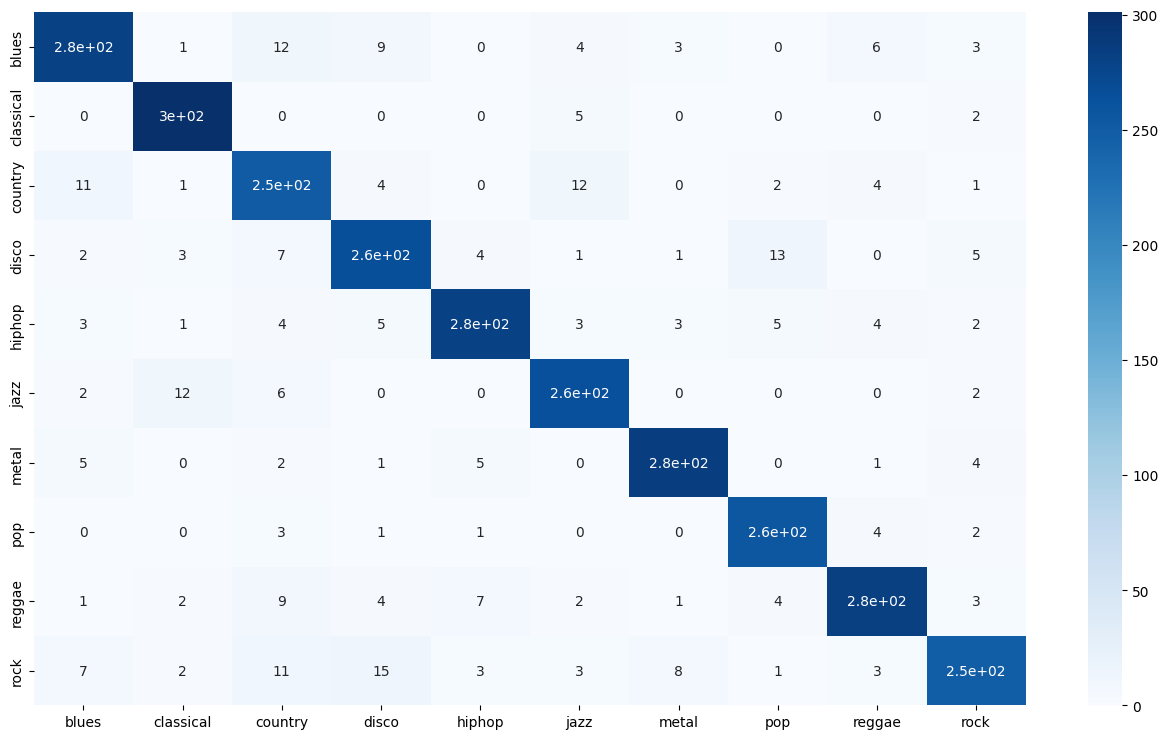

In [87]:
preds = xgb.predict(X_test)
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")